## Bài tập 1 ##

Stochastic Gradient Descent

In [ ]:
import numpy as np

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Initialize random theta values
    theta = np.random.randn(4, 1)  # 4 features (including the bias term)
    thetas_path = [theta]
    losses = []

    for epoch in range(n_epochs):
        for i in range(len(X_b)):
            # Select a random index for stochastic sampling
            random_index = np.random.randint(len(X_b))
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute the output (prediction)
            output = xi.dot(theta)

            # Compute the loss
            loss = output - yi

            # Compute the gradient for loss
            gradients = 2 * xi.T.dot(loss)

            # Update theta using the gradient and learning rate
            theta = theta - learning_rate * gradients

            # Append the updated theta
            thetas_path.append(theta)

            # Compute the loss and store it
            loss_value = np.sum((X_b.dot(theta) - y) ** 2) / len(y)
            losses.append(loss_value)

    return thetas_path, losses


Mini-batch Gradient Descent

In [1]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # Initialize random theta values
    theta = np.random.randn(4, 1)  # 4 features (including the bias term)
    thetas_path = [theta]
    losses = []

    for epoch in range(n_epochs):
        # Shuffle the dataset indices
        shuffled_indices = np.random.permutation(len(X_b))
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, len(X_b), minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Compute the output (prediction)
            output = xi.dot(theta)

            # Compute the loss
            loss = output - yi

            # Compute the gradient for the loss
            gradients = 2 * xi.T.dot(loss) / minibatch_size

            # Update theta using the gradient and learning rate
            theta = theta - learning_rate * gradients

            # Append the updated theta
            thetas_path.append(theta)

            # Compute the loss and store it
            loss_value = np.sum((X_b.dot(theta) - y) ** 2) / len(y)
            losses.append(loss_value)

    return thetas_path, losses


Batch Gradient Descent

In [2]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # Initialize random theta values
    theta = np.random.randn(4, 1)  # 4 features (including the bias term)
    thetas_path = [theta]
    losses = []

    for epoch in range(n_epochs):
        # Compute the output (prediction)
        output = X_b.dot(theta)

        # Compute the loss
        loss = output - y

        # Compute the gradient for the loss
        gradients = 2 * X_b.T.dot(loss) / len(X_b)

        # Update theta using the gradient and learning rate
        theta = theta - learning_rate * gradients

        # Append the updated theta
        thetas_path.append(theta)

        # Compute the loss and store it
        loss_value = np.sum((X_b.dot(theta) - y) ** 2) / len(y)
        losses.append(loss_value)

    return thetas_path, losses


## Câu 2 ##

In [10]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv(r"C:\Users\HOME\OneDrive\Documents\Downloads\BTC-Daily.csv")

# Loại bỏ các hàng bị trùng lặp
df = df.drop_duplicates()

# Xem một vài dòng dữ liệu để kiểm tra
print(df.head())


         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  


Range of dates covered: 2014-11-28 to 2022-03-01


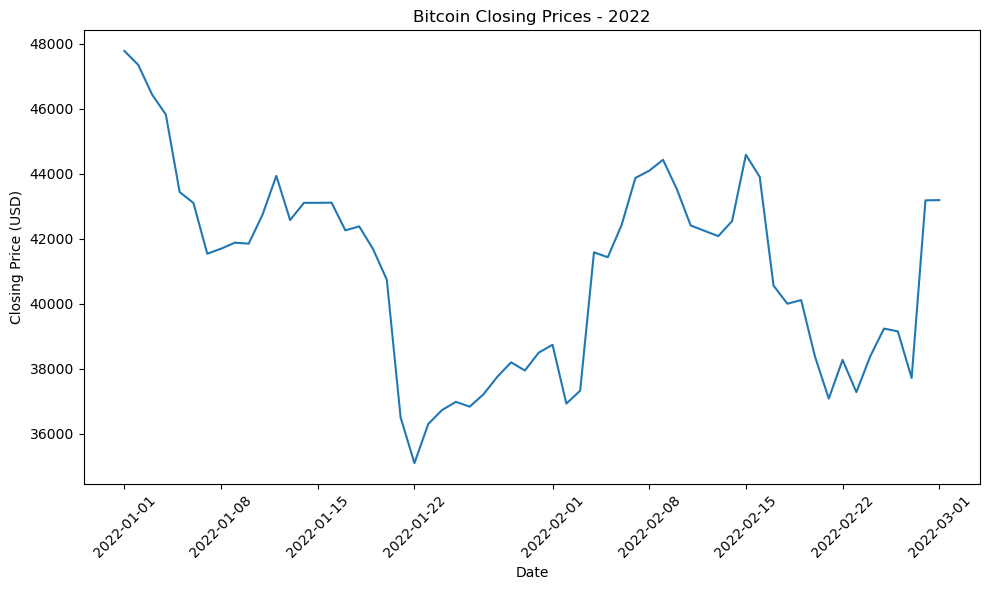

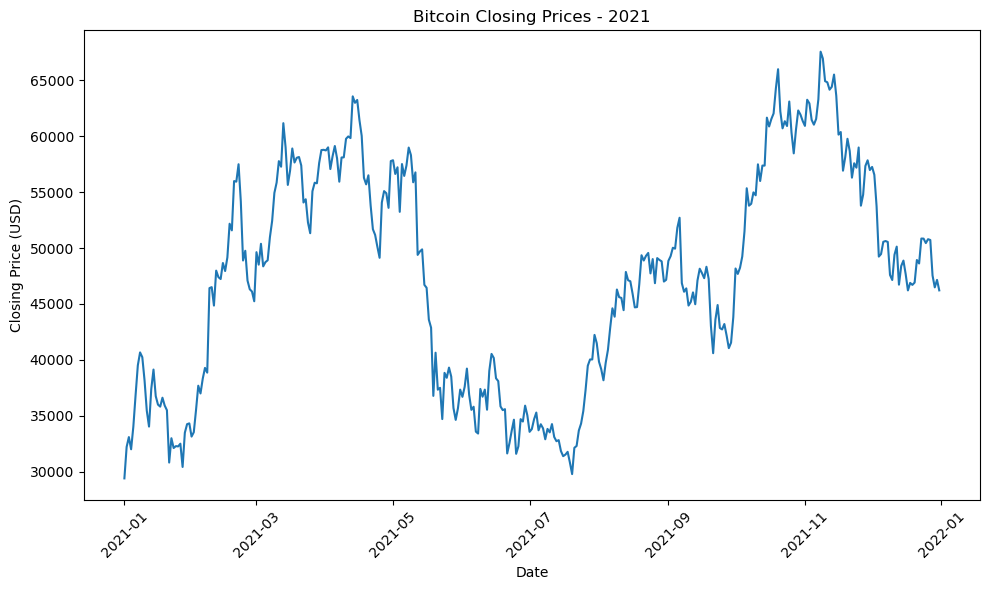

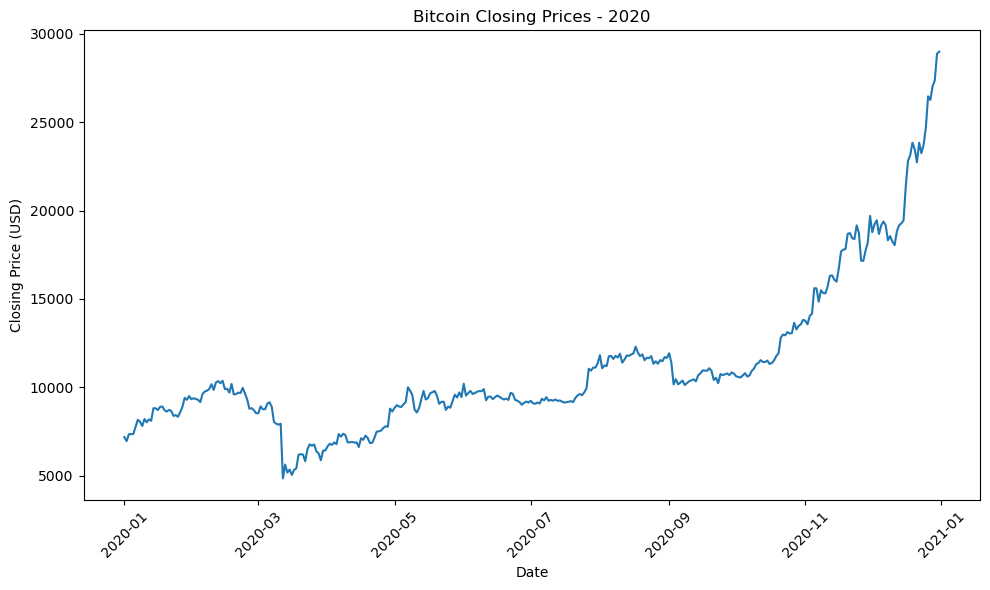

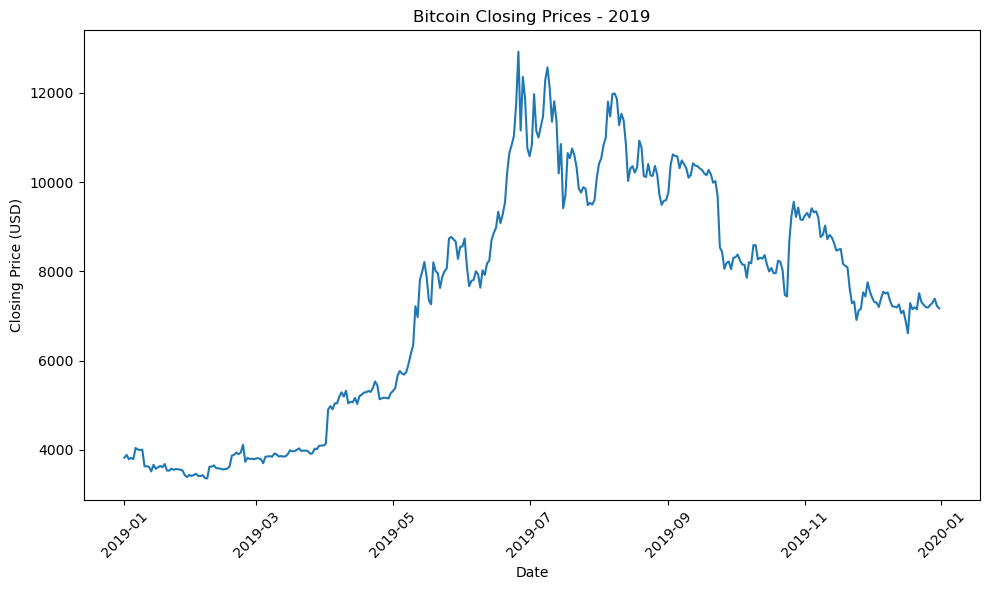

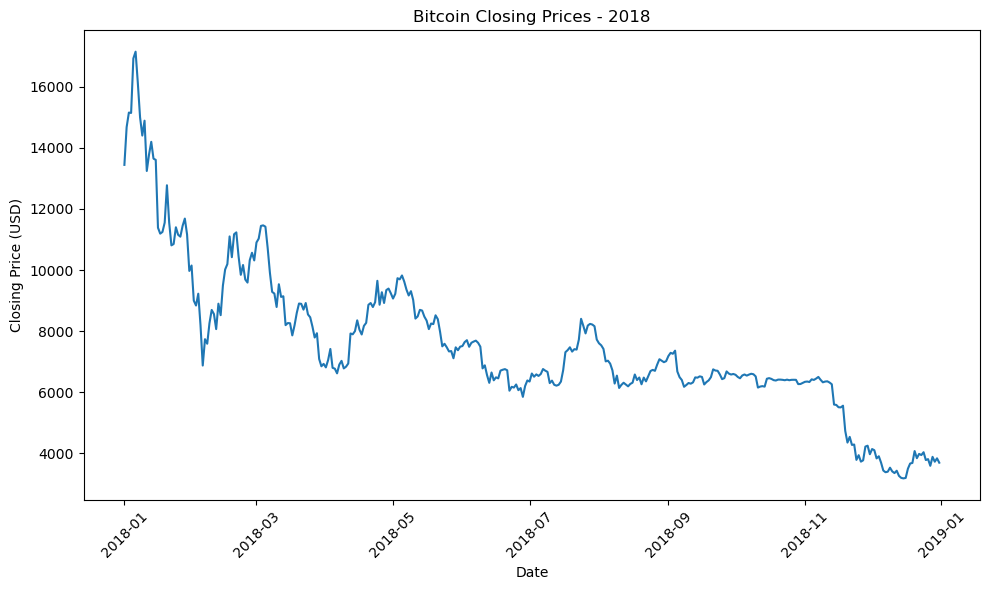

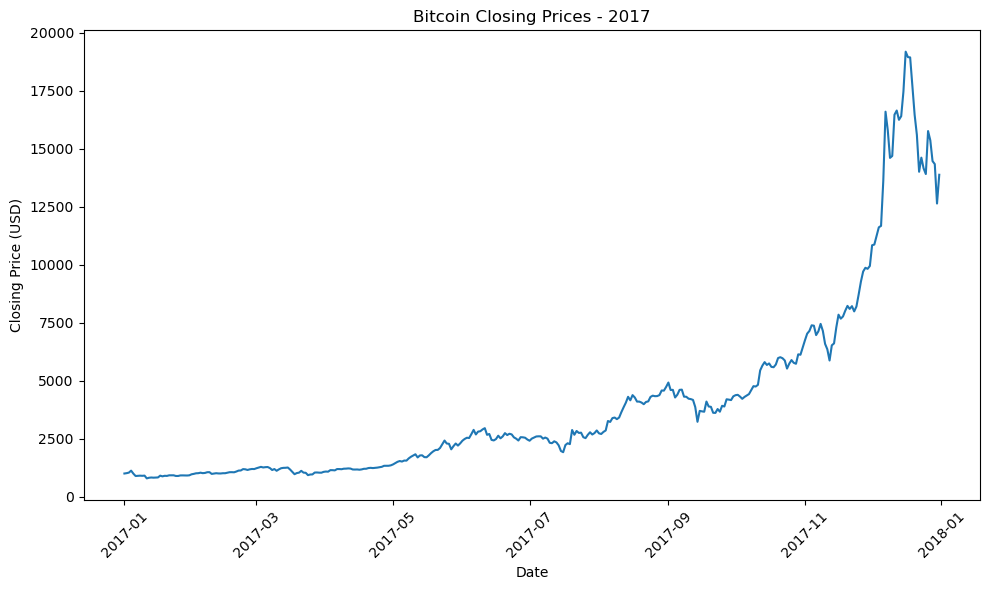

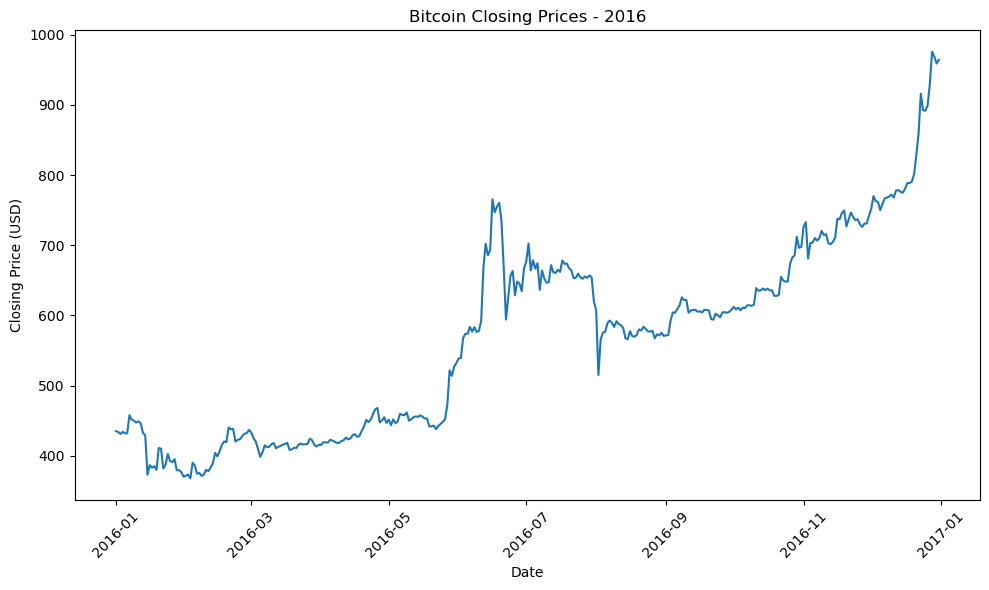

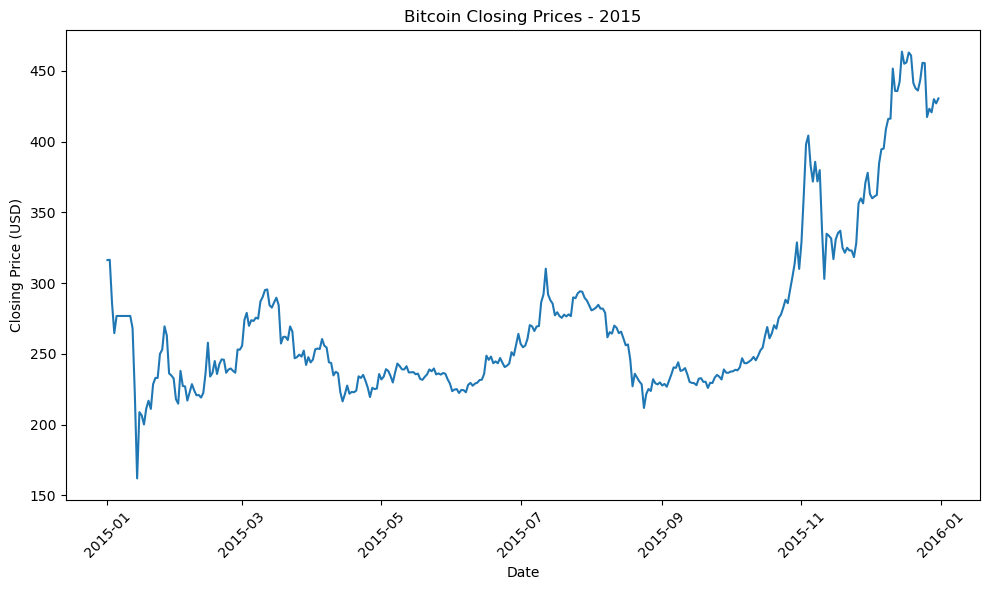

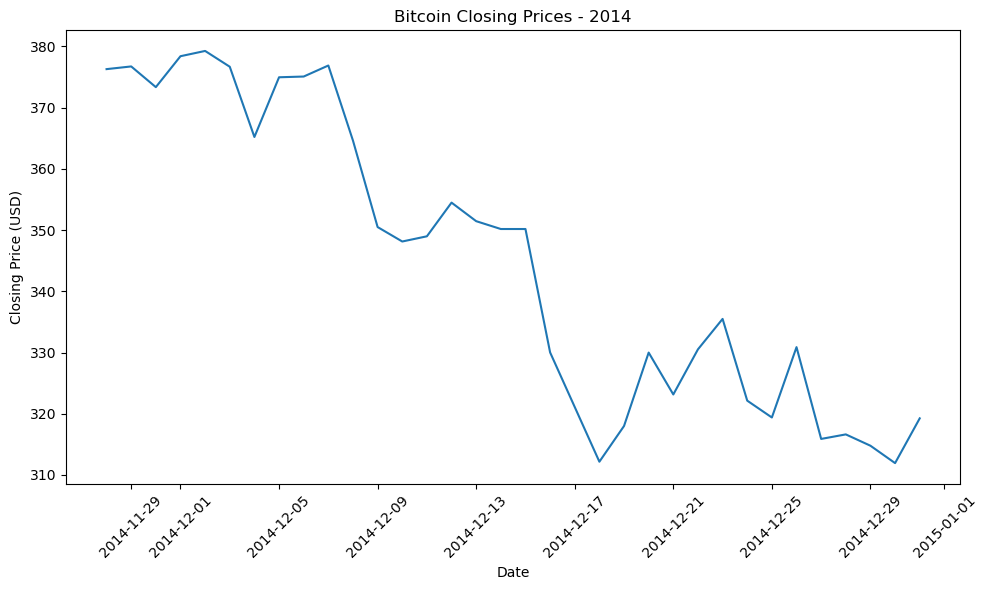

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển cột 'date' thành kiểu datetime
df['date'] = pd.to_datetime(df['date'])

# Xác định phạm vi ngày trong dữ liệu
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print("Range of dates covered:", date_range)

# Tạo các cột mới 'year', 'month', 'day' từ cột 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Lấy các năm duy nhất từ dữ liệu
unique_years = df['year'].unique()

# Lặp qua các năm và vẽ biểu đồ
for year in unique_years:
    # Lọc dữ liệu cho từng năm
    year_data = df[df['year'] == year]

    # Tạo cột chứa năm, tháng, ngày để vẽ biểu đồ
    merged_data = year_data

    # Vẽ biểu đồ giá đóng cửa theo năm
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date'], merged_data['close'])  # 'close' là cột giá đóng cửa
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
!pip install mplfinance


   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.0 kB 281.8 kB/s eta 0:00:01
   -------------------------------------- - 71.7/75.0 kB 438.9 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 376.6 kB/s eta 0:00:00


C:\Users\HOME\AppData\Local\Temp\ipykernel_25668\639261530.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


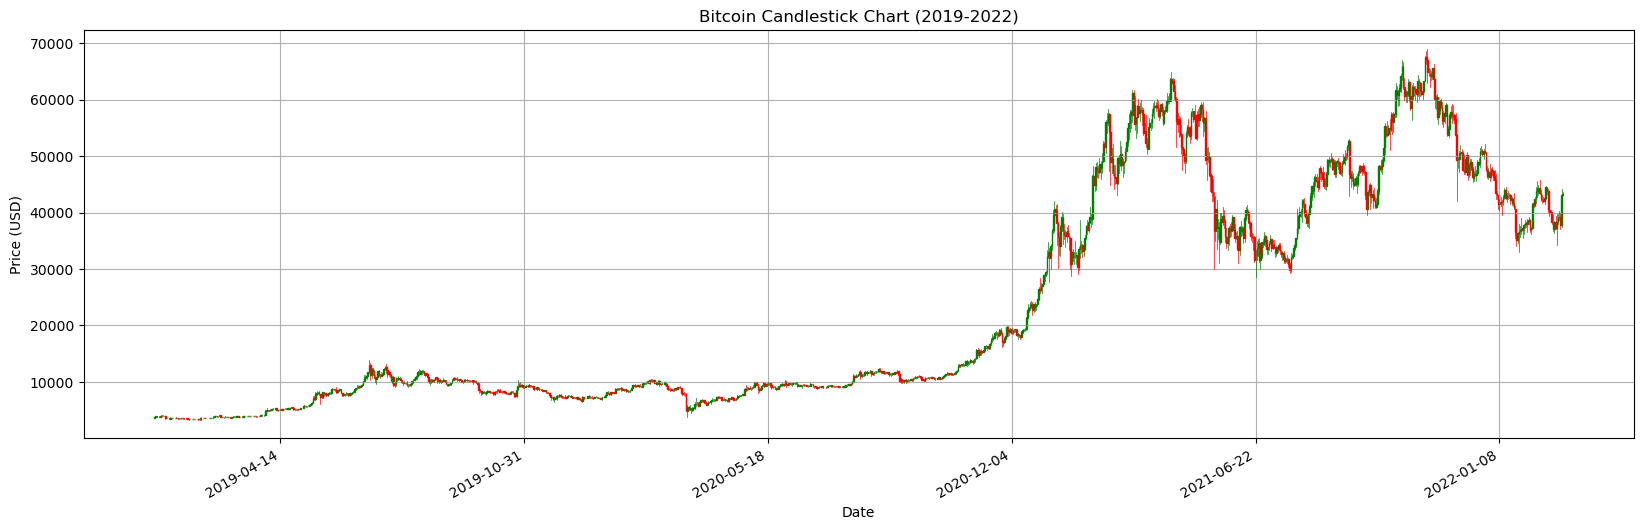

In [14]:
# Cài đặt thư viện mplfinance nếu bạn chưa cài đặt
# !pip install mplfinance

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime as dt

# Lọc dữ liệu từ 2019 đến 2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Chuyển đổi cột 'date' sang định dạng cần thiết cho matplotlib
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Tạo biểu đồ nến
fig, ax = plt.subplots(figsize=(20, 6))

# Vẽ biểu đồ nến (candlestick)
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

# Định dạng ngày tháng trên trục x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Thêm tiêu đề và nhãn cho trục
plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Bật lưới trên biểu đồ
plt.grid(True)

# Lưu biểu đồ dưới dạng file PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

# Hiển thị biểu đồ
plt.show()


In [15]:
import numpy as np

# Hàm dự đoán dựa trên X, w, b
def predict(X, w, b):
    # Dự đoán giá trị y bằng cách sử dụng w và b
    return X @ w + b

# Hàm tính gradient của hàm mất mát
def gradient(y_hat, y, X):
    # Tính toán lỗi dự đoán
    loss = y_hat - y
    
    # Gradient theo trọng số w
    dw = 2 * X.T.dot(loss) / len(y)
    
    # Gradient theo bias b
    db = 2 * np.sum(loss) / len(y)
    
    # Tính toán cost (chi phí)
    cost = np.sum(loss ** 2) / (2 * len(y))
    
    return dw, db, cost

# Hàm cập nhật trọng số và bias
def update_weight(w, b, lr, dw, db):
    # Cập nhật trọng số w
    w_new = w - lr * dw
    
    # Cập nhật bias b
    b_new = b - lr * db
    
    return w_new, b_new


In [7]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros((n_features, 1))  # Initialize weights
    b = 0  # Initialize bias
    losses = []

    for i in range(num_iterations):
        # Compute predictions
        y_hat = predict(X, w, b)

        # Compute gradient
        dw, db, cost = gradient(y_hat, y, X)

        # Update weights and bias
        w, b = update_weight(w, b, learning_rate, dw, db)

        # Store loss value for plotting
        losses.append(cost)

    return w, b, losses


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Định nghĩa X là các cột đặc trưng (features), y là cột mục tiêu (target)
X = df[['open', 'high', 'low', 'Volume BTC', 'Volume USD']]  # Các cột đặc trưng
y = df['close']  # Cột mục tiêu

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chia dữ liệu thành tập huấn luyện và kiểm tra (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Chuẩn hóa dữ liệu: fit với tập huấn luyện và transform với tập kiểm tra
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kiểm tra kích thước của tập dữ liệu sau khi chia
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)


Kích thước tập huấn luyện: (1855, 5) (1855,)
Kích thước tập kiểm tra: (796, 5) (796,)


In [23]:
import numpy as np

# Hàm Linear Regression sử dụng Batch Gradient Descent
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    # Số lượng mẫu và đặc trưng
    n_samples, n_features = X.shape
    
    # Khởi tạo trọng số w và bias b
    w = np.zeros((n_features, 1))  # Trọng số ban đầu là 0
    b = 0  # Bias ban đầu là 0
    
    # Danh sách lưu trữ giá trị loss để theo dõi quá trình huấn luyện
    losses = []
    
    # Lặp qua số lượng epoch
    for i in range(num_iterations):
        # Dự đoán giá trị y_hat dựa trên trọng số w và bias b
        y_hat = np.dot(X, w) + b
        
        # Tính toán độ lệch (error)
        error = y_hat - y.reshape(-1, 1)
        
        # Tính toán cost (hàm mất mát)
        cost = (1 / (2 * n_samples)) * np.sum(error ** 2)
        losses.append(cost)
        
        # Tính toán gradient đối với w và b
        dw = (1 / n_samples) * np.dot(X.T, error)
        db = (1 / n_samples) * np.sum(error)
        
        # Cập nhật trọng số và bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
    # Trả về trọng số, bias và danh sách loss theo từng iteration
    return w, b, losses


In [ ]:
import matplotlib.pyplot as plt

# Lọc dữ liệu từ ngày 01/01/2019 đến 01/04/2019
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Chuẩn bị X và y cho dự đoán
X_2019_q1 = df_2019_q1[['open', 'high', 'low']]  # Đặc trưng đầu vào (features)
y_2019_q1_actual = df_2019_q1['close']  # Giá trị thực tế (actual)

# Dự đoán giá đóng cửa cho giai đoạn này
y_2019_q1_pred = predict(X_2019_q1, w, b)

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')  # Giá thực tế
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')  # Giá dự đoán

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

# Hiển thị lưới và legend
plt.grid(True)
plt.legend()

# Xoay nhãn trên trục x cho dễ đọc
plt.xticks(rotation=45)

# Sắp xếp lại layout để các yếu tố không chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
